# Load data

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/data4/calibration_dof_to_step.csv', sep=',',decimal='.')
df

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_y_dist_warp,target_x_undist_warp,target_y_undist_warp,point_x,point_y,incr_x,incr_y,steps1,steps2,angle
0,0,8,img_0,1380.0,2231.5,1395.0,2205.0,1275.4757,1876.53470,1283.7833,...,1346.51990,1535.4520,1331.54960,0.25,0.333333,0.25,0.333333,-213,1998,8.9933
1,1,9,img_1,2518.0,2232.0,2525.5,2204.0,2419.1707,1862.05370,2418.0854,...,2283.15720,2252.3080,2251.75100,0.50,0.333333,0.25,0.000000,-1105,1105,169.9296
2,2,10,img_2,3661.0,2231.0,3653.5,2203.5,3557.9568,1846.12720,3543.8513,...,2145.24070,2906.3680,2115.94500,0.75,0.333333,0.25,0.000000,-1105,1105,207.6323
3,3,11,img_3,1381.5,1312.0,1399.0,1298.0,1263.9171,944.86250,1274.7429,...,555.02030,1479.2719,553.44450,0.25,0.666667,-0.50,0.333333,3104,-1319,3.4071
4,4,12,img_4,2520.0,1309.0,2526.5,1296.0,2409.2607,930.86176,2407.2964,...,988.47350,1790.4620,981.22345,0.50,0.666667,0.25,0.000000,-1105,1105,258.5200
5,5,13,img_5,3662.0,1308.0,3654.0,1295.0,3548.2322,918.95950,3533.8290,...,1019.33356,3701.8079,1010.77370,0.75,0.666667,0.25,0.000000,-1105,1105,77.9949


# Data preprocessing

In [3]:
df['cos']=np.cos(df['angle']*np.pi/180)
df['sin']=np.sin(df['angle']*np.pi/180)

In [4]:
x = df[['target_x_undist_warp', 'target_y_undist_warp', 'cos', 'sin']]
y = df[['point_x','point_y']]

In [5]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1, stratify=df['target_aruco'])

# Linear regressor

In [6]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x,y)

y_pred=model.predict(x)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y,y_pred,squared=False),r2_score(y,y_pred))

1.687622515361432e-05 0.9999999872471683


Text(0.5, 1.0, 'true vs predicted')

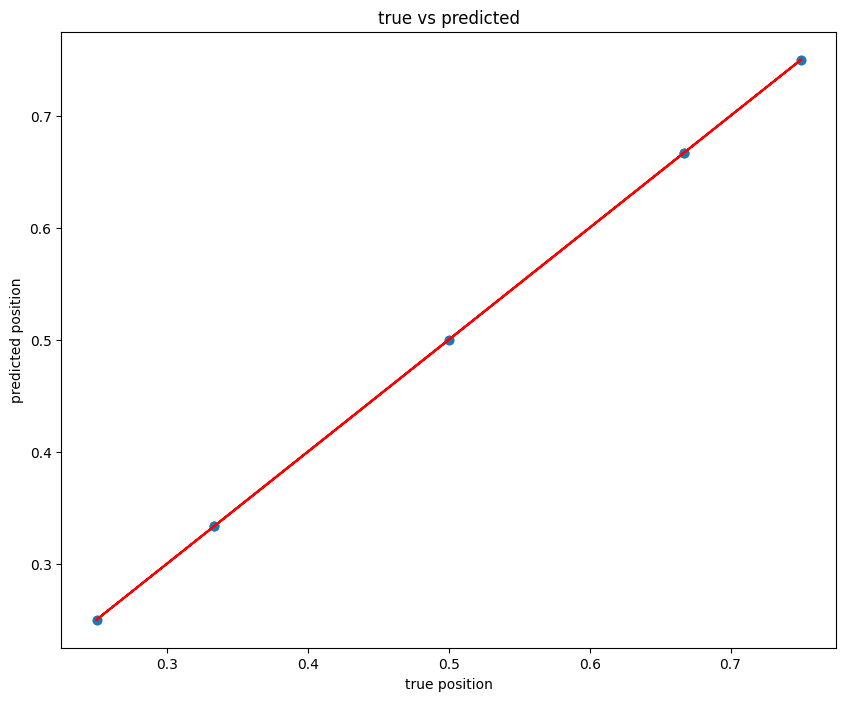

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

In [9]:
from pool.calibration import InverseKinematics
ik = InverseKinematics()
steps1,steps2=ik.cm_to_steps(y_pred[:,0],y_pred[:,1])

In [10]:
absolute_steps1=df['steps1'].cumsum()
absolute_steps2=df['steps2'].cumsum()

In [11]:
error1=np.abs(absolute_steps1-steps1)
error2=np.abs(absolute_steps2-steps2)
print(error1, error2)

0    0.709654
1    1.762201
2    2.910934
3    2.966112
4    3.525942
5    4.568243
Name: steps1, dtype: float64 0    0.069586
1    0.978581
2    2.118790
3    1.386190
4    1.962868
5    3.001230
Name: steps2, dtype: float64


# Save model

In [12]:
import os
import joblib
from pool.utils import Params

params=Params()
joblib.dump(model, os.path.join(params.PATH_REPO, 'data', "inverse_kinematics.pkl"))

['C:\\Users\\ioliv\\OneDrive\\Escritorio\\TFM\\software\\repo\\pool-playing-robot\\data\\inverse_kinematics.pkl']